# Question 1: Implement KNN classifier to predict thyroid disease

# Objective: Implement KNN on the provided dataset and evaluate the performance of a classification model.

# 1. Load the Breast Cancer dataset from Thyroid_Diff.csv. (source: dataset folder in the google classroom)

In [ ]:
import pandas as pd
# load data from file
df = pd.read_csv("/content/Thyroid_Diff.csv")

df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


# 2. Preprocessed the dataset by the following orders:

Handling Missing Values: Ensure there are no missing values. If there are any, decide on a strategy to handle them (e.g., imputation)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
df.isnull().sum()
# there are no missing values

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [ ]:
# if there are missing valus we can do that:
# df.mean()
# meanVal = df['features name'].mean()
# meanVal
# df['features name'].fillna(value=meanVal, inplace=True)
# df.isnull().sum()

Encoding: Convert categorical variables into numerical values.

In [ ]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
df['Smoking'] = label.fit_transform(df['Smoking'])
df['Hx Smoking'] = label.fit_transform(df['Hx Smoking'])
df['Hx Radiothreapy'] = label.fit_transform(df['Hx Radiothreapy'])
df['Thyroid Function'] = label.fit_transform(df['Thyroid Function'])

df['Physical Examination'] = label.fit_transform(df['Physical Examination'])
df['Adenopathy'] = label.fit_transform(df['Adenopathy'])
df['Pathology'] = label.fit_transform(df['Pathology'])
df['Focality'] = label.fit_transform(df['Focality'])
df['Risk'] = label.fit_transform(df['Risk'])

df['T'] = label.fit_transform(df['T'])
df['N'] = label.fit_transform(df['N'])
df['M'] = label.fit_transform(df['M'])
df['Stage'] = label.fit_transform(df['Stage'])
df['Response'] = label.fit_transform(df['Response'])
df['Recurred'] = label.fit_transform(df['Recurred'])
#df.astype(str).apply(LabelEncoder().fit_transform)
df[:2]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0


Identify outliers if any in the dataset.

In [ ]:
df.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.127937,0.073107,0.018277,1.950392,2.561358,2.924282,2.550914,0.644909,1.566580,2.206266,0.543081,0.046997,0.242820,1.574413,0.281984
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.630917,1.350110,1.172106,0.890257,0.479167,0.643233,1.344667,0.857732,0.211910,0.773274,0.917585,0.450554
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.500000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,3.000000,1.000000,2.000000,6.000000,2.000000,1.000000,4.000000,3.000000,1.000000


<Axes: ylabel='Age'>

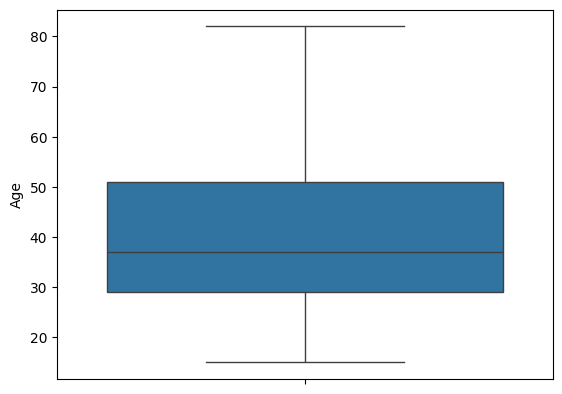

In [ ]:
import seaborn as sns
sns.boxplot(df['Age'])

# Normalization: Normalize numerical features.

In [ ]:
# normalization
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

data = df.iloc[:, :-1]
scaler = zscore(data)


normalized_data = pd.DataFrame(scaler)
normalized_data[:10]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,-0.917439,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,0.325319,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,0.464420
1,-0.454315,-0.477037,-0.383023,3.560698,-0.136444,0.078732,-1.157980,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
2,-0.718957,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
3,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
4,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,-1.157980,0.064684,-0.619635,-1.347656,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
5,0.736577,2.096274,2.610810,-0.280844,-0.136444,0.078732,-1.157980,0.064684,-0.619635,-1.347656,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,0.464420
6,0.008810,-0.477037,-0.383023,3.560698,-0.136444,-3.095404,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
7,0.339613,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
8,0.670416,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824
9,-0.057351,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,-1.6429,-0.633987,-0.22207,-0.314426,-0.626824


Splitting: Split the dataset into training and testing sets for model evaluation.

In [ ]:
y=df['Recurred']
X=data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train KNN classifiers with different neighbors until you obtain the best accuracy.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn.fit(X_train, y_train)


# Predict the labels for test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8441558441558441


# 4. Evaluate the model's performance using classification metrics.


In [ ]:
#confusion matrix
# defining classification model evaluation matrics
from sklearn import metrics
def evaluation_analysis(true_lable, predicted):
    print ("accuracy: ", metrics.accuracy_score(true_lable, predicted))
    print ("f1 score micro: ", metrics.f1_score(true_lable, predicted, average='micro'))
    print ("precision: ", metrics.precision_score(true_lable, predicted))
    print ("recal: ", metrics.recall_score(true_lable, predicted))

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
evaluation_analysis(y_test, y_pred)

accuracy:  0.8441558441558441
f1 score micro:  0.8441558441558441
precision:  0.8888888888888888
recal:  0.42105263157894735


# 5. Plot the ROC curve.

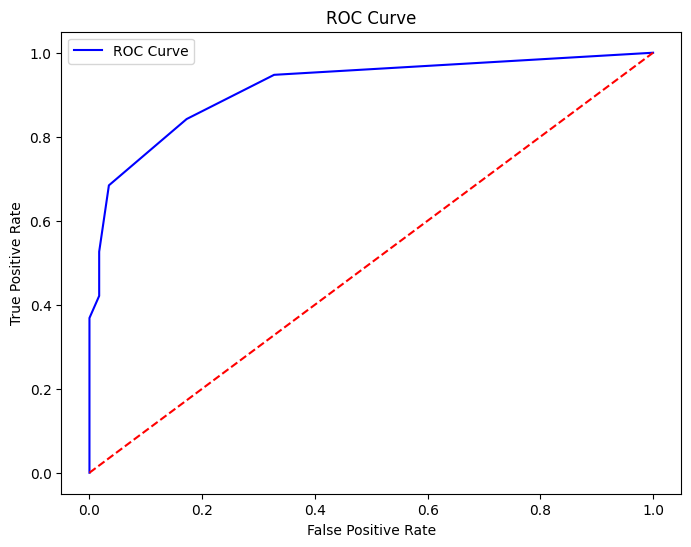

ROC AUC Score: 0.92


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Getting predicted probabilities
y_proba = knn.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')